In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ride_data_df = pd.read_csv('Downloads/ride_data.csv', sep = ',')
city_data_df = pd.read_csv('Downloads\city_data.csv', sep = ',')

In [3]:
rc_data_df = pd.merge(ride_data_df, city_data_df, on='city')
rc_data_df.head()
city_ride_df=pd.DataFrame(rc_data_df, columns=['city', 'date', 'fare', 'ride_id', 'driver_count', 'type'])
cities = city_ride_df['city'].value_counts()
GRP = city_ride_df.groupby(['city'])
afpc = GRP['fare'].mean()
trpc = GRP['fare'].count()
tdpc = GRP['driver_count'].unique()
city_type = GRP['type'].unique()
rides = pd.DataFrame({'city':cities, 'Average_Fare':afpc, 'Total_Number_of_Rides':trpc, 
                      'Total_Number_of_Drivers':tdpc,'City_Type':city_type},
                    columns= ['city','Average_Fare', 'Total_Number_of_Rides', 
                              'Total_Number_of_Drivers', 'City_Type'])
rides.head()

,city,Average_Fare,Total_Number_of_Rides,Total_Number_of_Drivers,City_Type
Alvarezhaven,31,23.928710,31,[21],[Urban]
Alyssaberg,26,20.609615,26,[67],[Urban]
Anitamouth,9,37.315556,9,[16],[Suburban]
Antoniomouth,22,23.625000,22,[21],[Urban]
Aprilchester,19,21.981579,19,[49],[Urban]


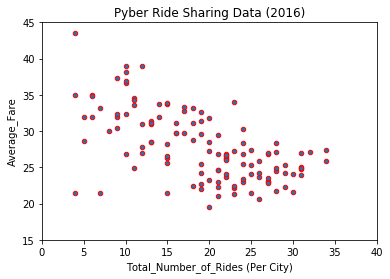

In [4]:
rides.plot(kind='scatter', x='Total_Number_of_Rides', y='Average_Fare',marker="o", facecolors="red", edgecolors="red")
plt.xlabel('Total_Number_of_Rides (Per City)')
plt.ylabel('Average_Fare')
plt.xlim(0,40)
plt.ylim(15,45)
plt.title('Pyber Ride Sharing Data (2016)')
plt.show()

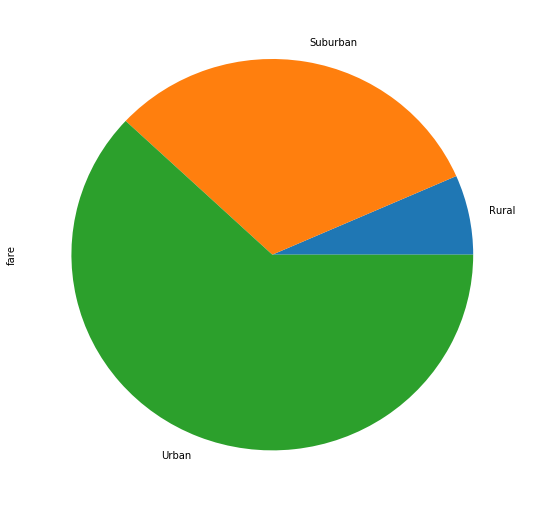

In [5]:
TF = city_ride_df.groupby(['type'])['fare'].sum()
city_chart1 = TF.plot(kind='pie', figsize=(9,9))
plt.show()

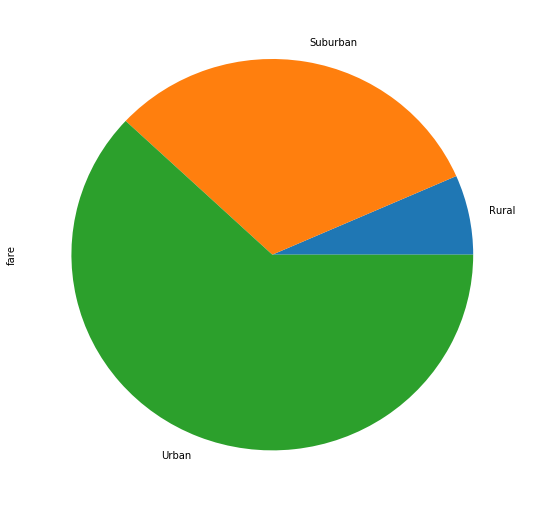

In [6]:
TR = city_ride_df.groupby(['type'])['ride_id'].sum()
city_chart2 = TF.plot(kind='pie', figsize=(9,9))
plt.show()

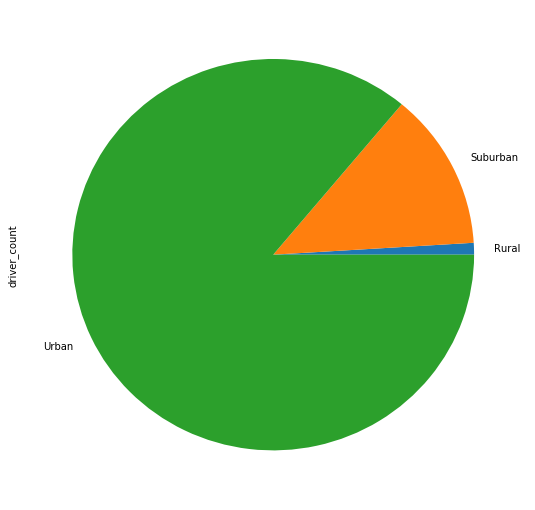

In [7]:
TR = city_ride_df.groupby(['type'])['driver_count'].sum()
city_chart3 = TR.plot(kind='pie', figsize=(9,9))
plt.show()